In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pandas as pd

In [4]:
def import_menu():
    return pd.read_csv('menu.csv')

menu = import_menu()

In [5]:
menu.head(5)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [6]:
menu.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,495.750000,...,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,...,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,...,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,...,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,865.000000,...,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,102.000000,2.500000,575.000000,192.000000,3600.000000,...,141.000000,47.000000,7.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000


In [7]:
menu.dtypes

Category                          object
Item                              object
Serving Size                      object
Calories                           int64
Calories from Fat                  int64
Total Fat                        float64
Total Fat (% Daily Value)          int64
Saturated Fat                    float64
Saturated Fat (% Daily Value)      int64
Trans Fat                        float64
Cholesterol                        int64
Cholesterol (% Daily Value)        int64
Sodium                             int64
Sodium (% Daily Value)             int64
Carbohydrates                      int64
Carbohydrates (% Daily Value)      int64
Dietary Fiber                      int64
Dietary Fiber (% Daily Value)      int64
Sugars                             int64
Protein                            int64
Vitamin A (% Daily Value)          int64
Vitamin C (% Daily Value)          int64
Calcium (% Daily Value)            int64
Iron (% Daily Value)               int64
dtype: object

In [8]:
menu.shape

(260, 24)

In [9]:
menu.tail()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),10.1 oz (285 g),510,150,17.0,26,9.0,44,0.5,...,80,27,1,4,64,12,15,0,40,8
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),13.4 oz (381 g),690,200,23.0,35,12.0,58,1.0,...,106,35,1,5,85,15,20,0,50,10
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),340,100,11.0,17,6.0,29,0.0,...,53,18,1,2,43,8,10,0,25,6
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),14.2 oz (403 g),810,290,32.0,50,15.0,76,1.0,...,114,38,2,9,103,21,20,0,60,6
259,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Snack),7.1 oz (202 g),410,150,16.0,25,8.0,38,0.0,...,57,19,1,5,51,10,10,0,30,4


In [10]:
menu.notnull().head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [11]:
menu['Category'].unique()

array(['Breakfast', 'Beef & Pork', 'Chicken & Fish', 'Salads',
       'Snacks & Sides', 'Desserts', 'Beverages', 'Coffee & Tea',
       'Smoothies & Shakes'], dtype=object)

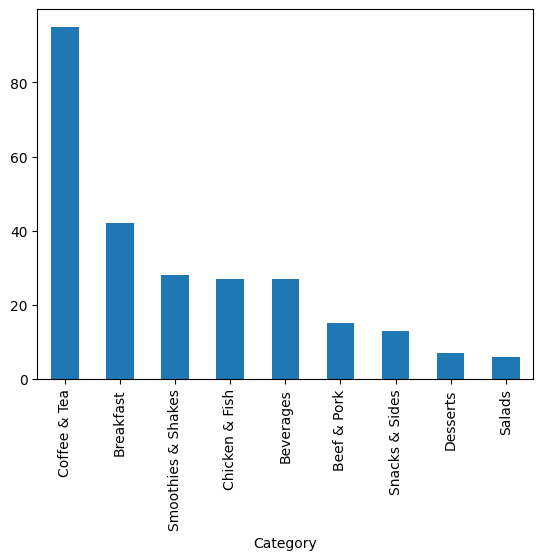

In [12]:
menu['Category'].value_counts().plot(kind='bar');

In [13]:
menu['Item'].unique()

array(['Egg McMuffin', 'Egg White Delight', 'Sausage McMuffin',
       'Sausage McMuffin with Egg', 'Sausage McMuffin with Egg Whites',
       'Steak & Egg McMuffin',
       'Bacon, Egg & Cheese Biscuit (Regular Biscuit)',
       'Bacon, Egg & Cheese Biscuit (Large Biscuit)',
       'Bacon, Egg & Cheese Biscuit with Egg Whites (Regular Biscuit)',
       'Bacon, Egg & Cheese Biscuit with Egg Whites (Large Biscuit)',
       'Sausage Biscuit (Regular Biscuit)',
       'Sausage Biscuit (Large Biscuit)',
       'Sausage Biscuit with Egg (Regular Biscuit)',
       'Sausage Biscuit with Egg (Large Biscuit)',
       'Sausage Biscuit with Egg Whites (Regular Biscuit)',
       'Sausage Biscuit with Egg Whites (Large Biscuit)',
       'Southern Style Chicken Biscuit (Regular Biscuit)',
       'Southern Style Chicken Biscuit (Large Biscuit)',
       'Steak & Egg Biscuit (Regular Biscuit)',
       'Bacon, Egg & Cheese McGriddles',
       'Bacon, Egg & Cheese McGriddles with Egg Whites',
       'Sau

In [14]:
menu.iloc[130:135]

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
130,Beverages,1% Low Fat Milk Jug,1 carton (236 ml),100,20,2.5,4,1.5,8,0.0,...,12,4,0,0,12,8,10,4,30,0
131,Beverages,Fat Free Chocolate Milk Jug,1 carton (236 ml),130,0,0.0,0,0.0,0,0.0,...,23,8,1,2,22,9,10,0,30,8
132,Beverages,Minute Maid 100% Apple Juice Box,6 fl oz (177 ml),80,0,0.0,0,0.0,0,0.0,...,21,7,0,0,19,0,0,100,10,0
133,Beverages,Minute Maid Orange Juice (Small),12 fl oz cup,150,0,0.0,0,0.0,0,0.0,...,34,11,0,0,30,2,0,130,2,0
134,Beverages,Minute Maid Orange Juice (Medium),16 fl oz cup,190,0,0.0,0,0.0,0,0.0,...,44,15,0,0,39,3,0,160,4,0


In [ ]:
Data Visualizations

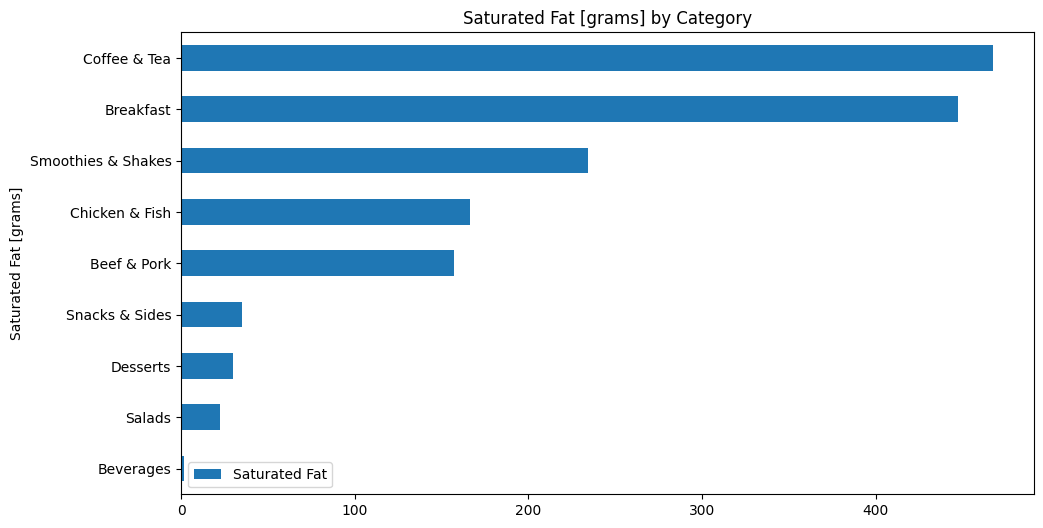

In [15]:
categories_by_saturated_fat = menu[ ['Category', 'Saturated Fat'] ] \
                           .groupby('Category') \
                           .sum() \
                           .sort_values('Saturated Fat', ascending=True) \
                           .head(70)

categories_by_saturated_fat

categories_by_saturated_fat.plot(kind='barh', figsize=(11,6))

plt.ylabel('Saturated Fat [grams]')
plt.title('Saturated Fat [grams] by Category');

In [16]:
items_by_saturated_fat = menu[ ['Item', 'Saturated Fat'] ] \
                           .groupby('Item') \
                           .sum() \
                           .sort_values(['Saturated Fat', 'Item'], ascending=True) \
                           .head(10)

items_by_saturated_fat

,Saturated Fat
Item,
Apple Slices,0.0
Blueberry Pomegranate Smoothie (Medium),0.0
Blueberry Pomegranate Smoothie (Small),0.0
Coca-Cola Classic (Child),0.0
Coca-Cola Classic (Large),0.0
Coca-Cola Classic (Medium),0.0
Coca-Cola Classic (Small),0.0
Coffee (Large),0.0
Coffee (Medium),0.0


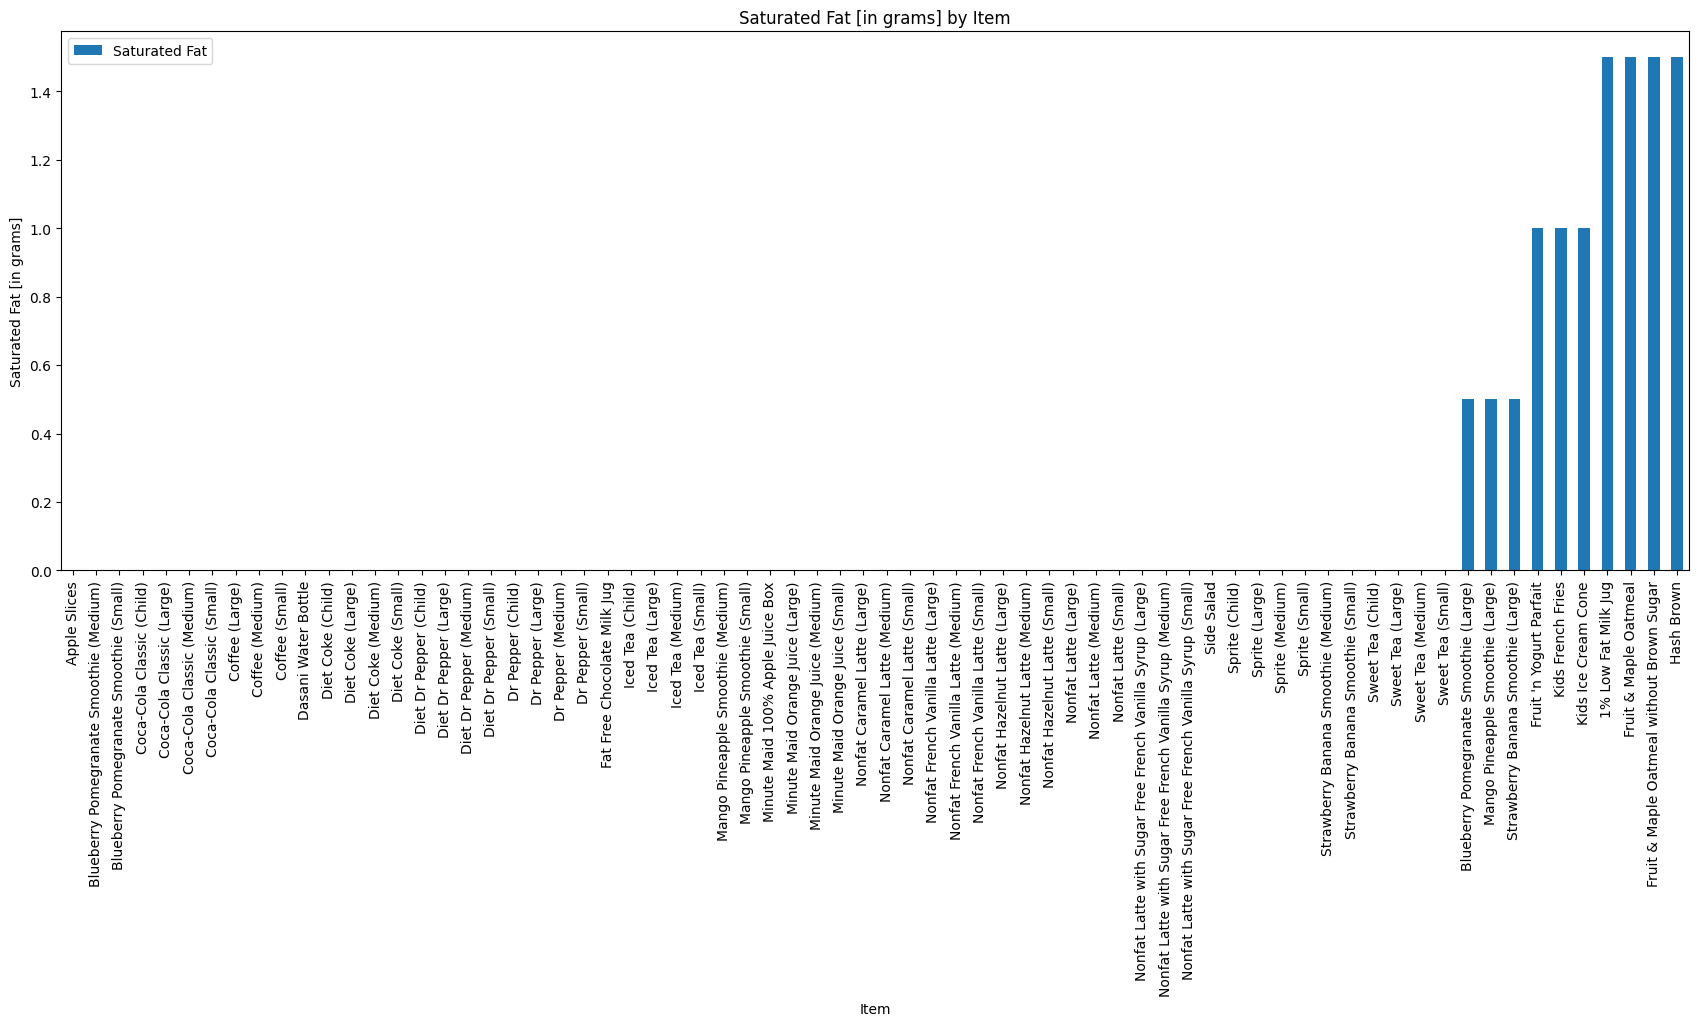

In [17]:
items_by_saturated_fat = menu[ ['Item', 'Saturated Fat'] ] \
                           .groupby('Item') \
                           .sum() \
                           .sort_values(['Saturated Fat', 'Item'], ascending=True) \
                           .head(70)

items_by_saturated_fat

items_by_saturated_fat.plot(kind='bar', figsize=(21,7))

plt.ylabel('Saturated Fat [in grams]')
plt.title('Saturated Fat [in grams] by Item');

In [ ]:
Which menu items have the least saturated fat?

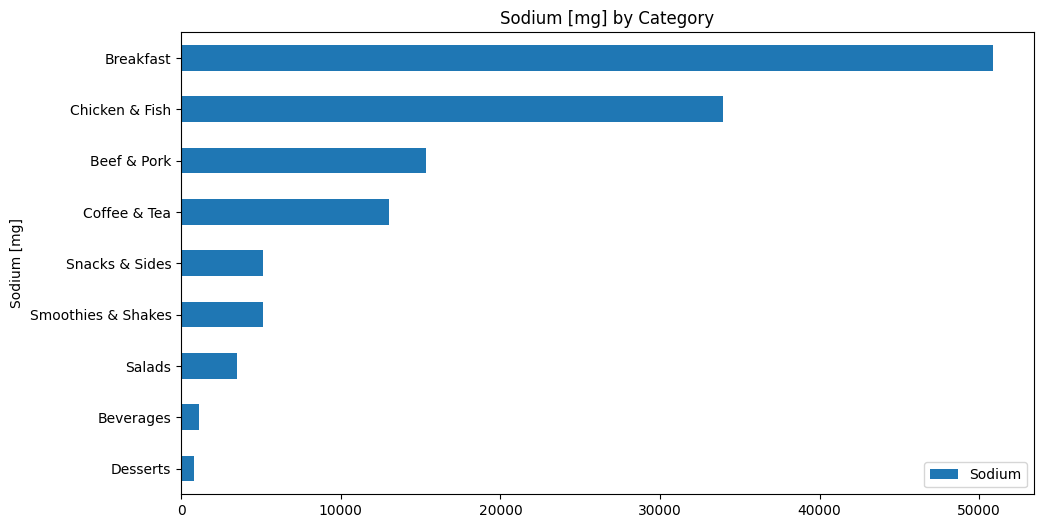

In [18]:
categories_by_sodium = menu[ ['Category', 'Sodium'] ] \
                           .groupby('Category') \
                           .sum() \
                           .sort_values('Sodium', ascending=True) \
                           .head(70)

categories_by_sodium

categories_by_sodium.plot(kind='barh', figsize=(11,6))

plt.ylabel('Sodium [mg]')
plt.title('Sodium [mg] by Category');

In [ ]:
Which menu items have the least sodium?

In [19]:
items_by_sodium = menu[ ['Item', 'Sodium'] ] \
                           .groupby('Item') \
                           .sum() \
                           .sort_values(['Sodium', 'Item'], ascending=True) \
                           .head(10)

items_by_sodium

,Sodium
Item,
Apple Slices,0
Coca-Cola Classic (Child),0
Coca-Cola Classic (Small),0
Coffee (Large),0
Coffee (Medium),0
Coffee (Small),0
Dasani Water Bottle,0
Minute Maid Orange Juice (Medium),0
Minute Maid Orange Juice (Small),0


In [ ]:
Top 10 Menu Items With The Least Sodium

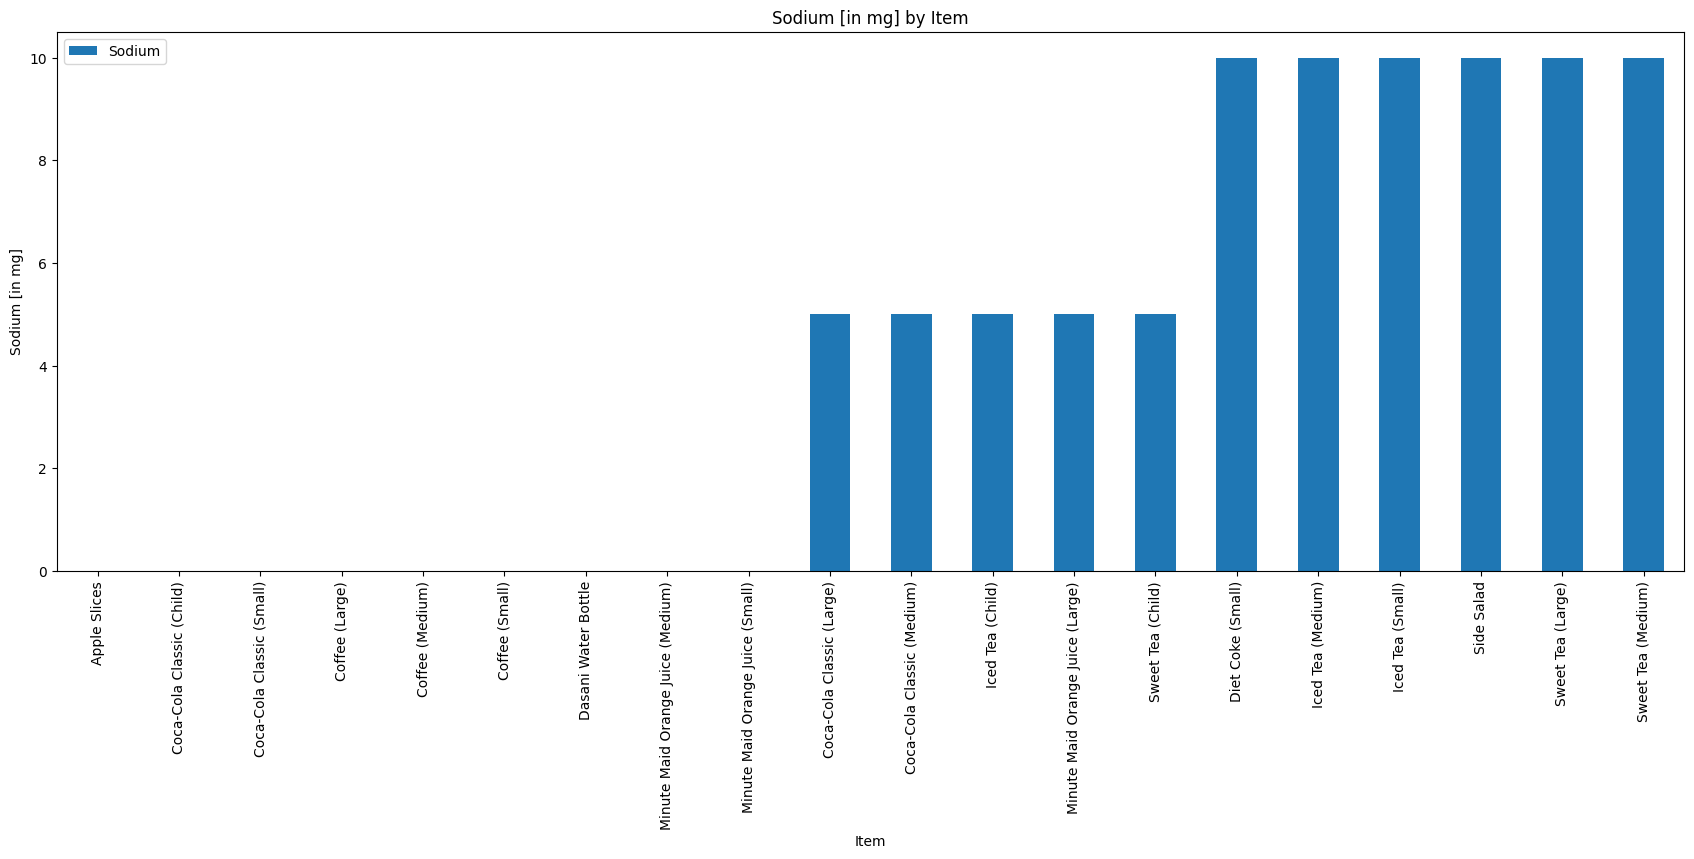

In [20]:
items_by_sodium = menu[ ['Item', 'Sodium'] ] \
                           .groupby('Item') \
                           .sum() \
                           .sort_values(['Sodium', 'Item'], ascending=True) \
                           .head(20)

items_by_sodium

items_by_sodium.plot(kind='bar', figsize=(21,7))

plt.ylabel('Sodium [in mg]')
plt.title('Sodium [in mg] by Item');

In [ ]:
Which menu items have the least sugars?

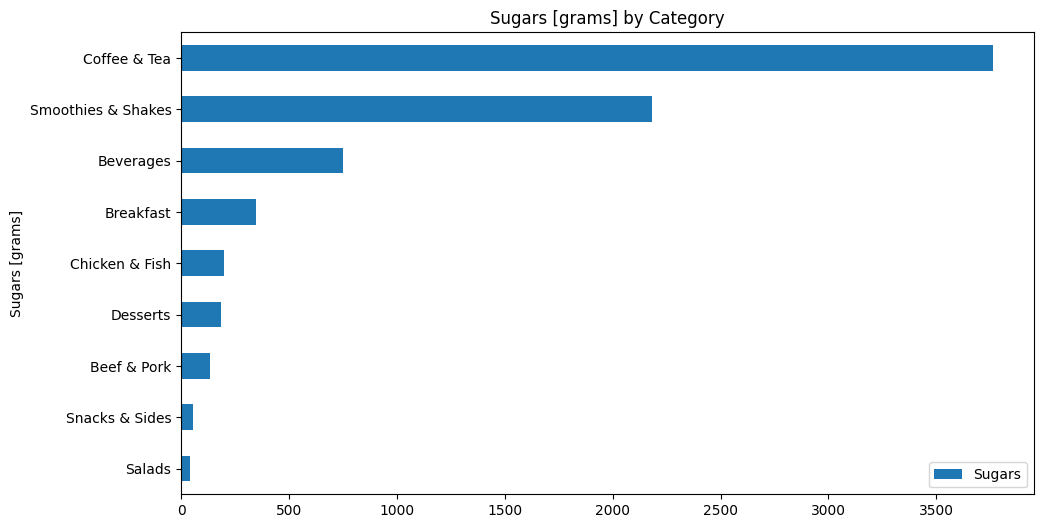

In [21]:
categories_by_sugars = menu[ ['Category', 'Sugars'] ] \
                           .groupby('Category') \
                           .sum() \
                           .sort_values('Sugars', ascending=True) \
                           .head(70)

categories_by_sugars

categories_by_sugars.plot(kind='barh', figsize=(11,6))

plt.ylabel('Sugars [grams]')
plt.title('Sugars [grams] by Category');

In [22]:
items_by_sugars = menu[ ['Item', 'Sugars'] ] \
                           .groupby('Item') \
                           .sum() \
                           .sort_values(['Sugars', 'Item'], ascending=True) \
                           .head(10)

items_by_sugars

,Sugars
Item,
Chicken McNuggets (10 piece),0
Chicken McNuggets (20 piece),0
Chicken McNuggets (4 piece),0
Chicken McNuggets (6 piece),0
Coffee (Large),0
Coffee (Medium),0
Coffee (Small),0
Dasani Water Bottle,0
Diet Coke (Child),0


In [ ]:
Top 10 Menu Items With The Least Sugars

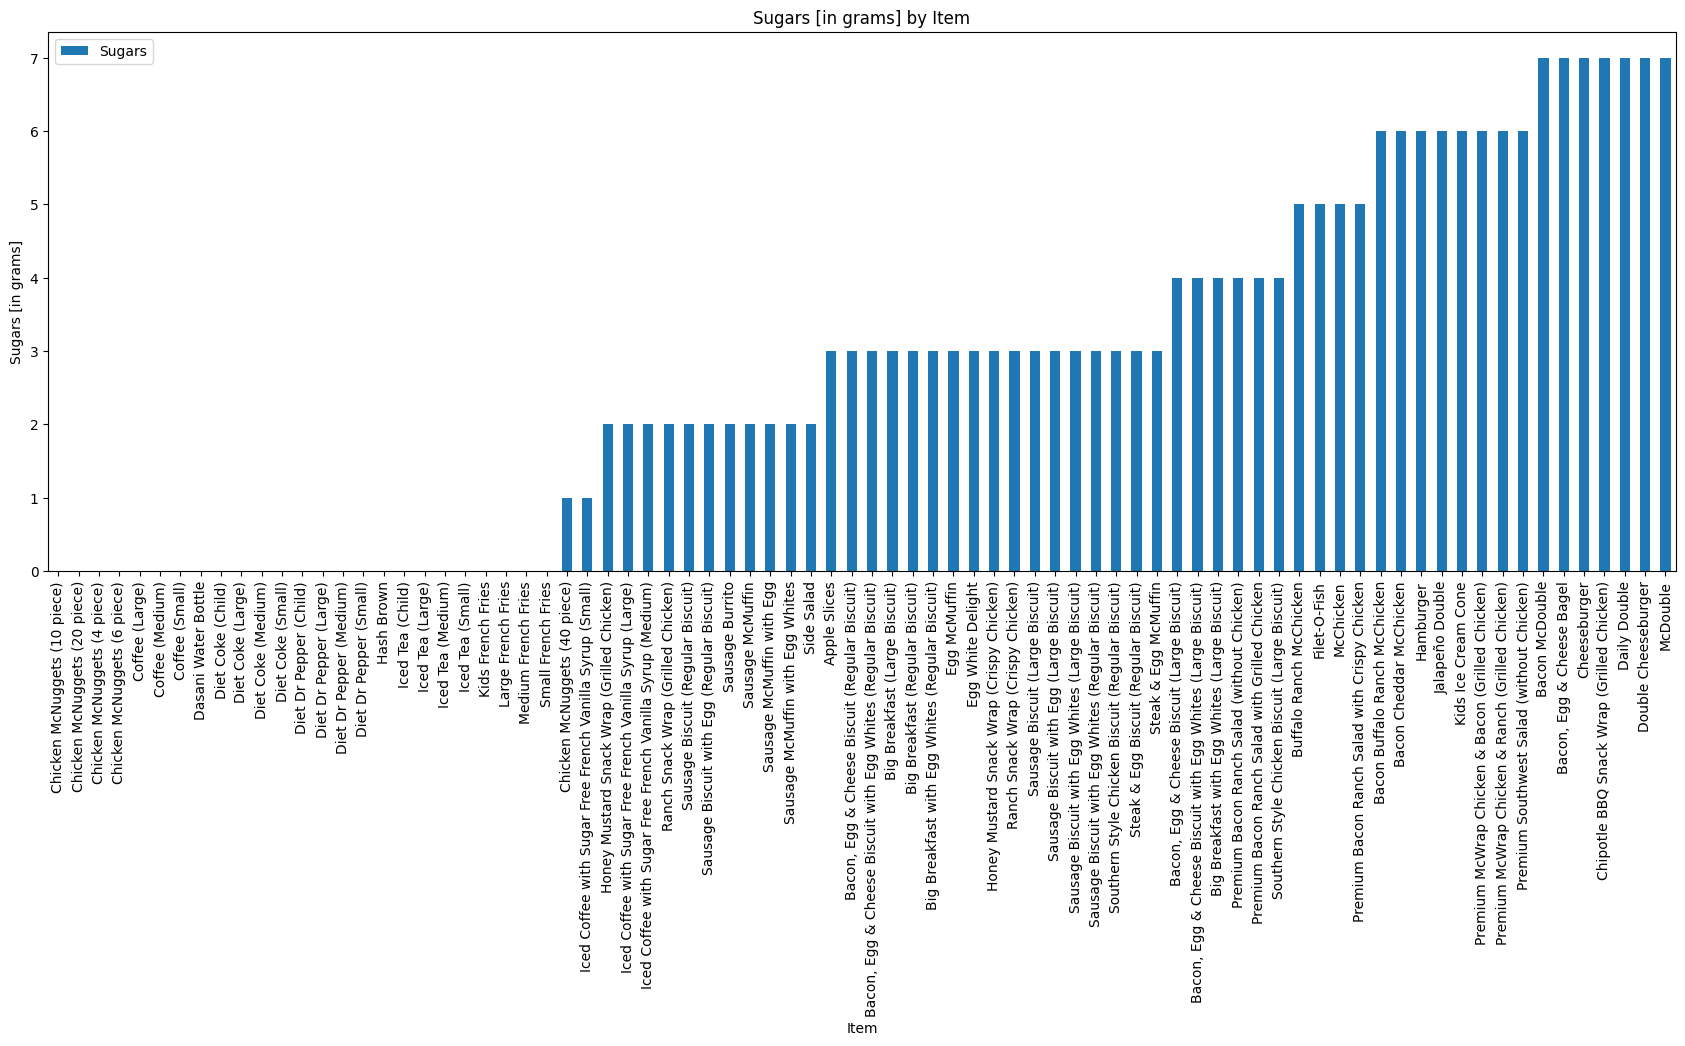

In [23]:
items_by_sugars = menu[ ['Item', 'Sugars'] ] \
                           .groupby('Item') \
                           .sum() \
                           .sort_values(['Sugars', 'Item'], ascending=True) \
                           .head(80)

items_by_sugars

items_by_sugars.plot(kind='bar', figsize=(21,7))

plt.ylabel('Sugars [in grams]')
plt.title('Sugars [in grams] by Item');

In [ ]:
Which menu items have the most dietary fiber?

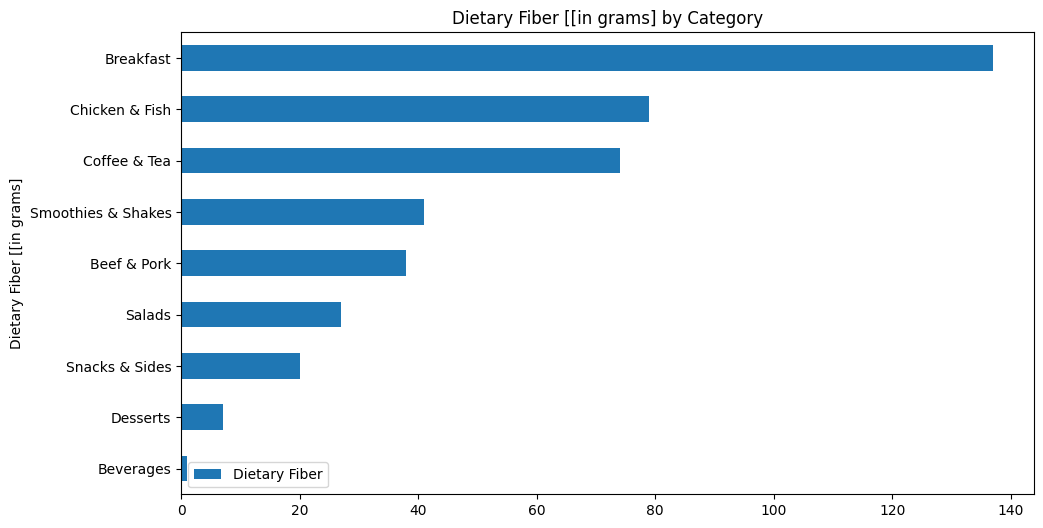

In [24]:
categories_by_dietary_fiber = menu[ ['Category', 'Dietary Fiber'] ] \
                           .groupby('Category') \
                           .sum() \
                           .sort_values('Dietary Fiber', ascending=True) \
                           .head(70)

categories_by_dietary_fiber

categories_by_dietary_fiber.plot(kind='barh', figsize=(11,6))

plt.ylabel('Dietary Fiber [[in grams]')
plt.title('Dietary Fiber [[in grams] by Category');

In [25]:
items_by_dietary_fiber = menu[ ['Item', 'Dietary Fiber'] ] \
                           .groupby('Item') \
                           .sum() \
                           .sort_values(['Dietary Fiber', 'Item'], ascending=False) \
                           .head(10)

items_by_dietary_fiber

,Dietary Fiber
Item,
Premium Southwest Salad with Grilled Chicken,7
Premium Southwest Salad with Crispy Chicken,7
Big Breakfast with Hotcakes and Egg Whites (Large Biscuit),7
Big Breakfast with Hotcakes (Large Biscuit),7
Premium Southwest Salad (without Chicken),6
Chicken McNuggets (40 piece),6
Big Breakfast with Hotcakes and Egg Whites (Regular Biscuit),6
Big Breakfast with Hotcakes (Regular Biscuit),6
Premium McWrap Southwest Chicken (Grilled Chicken),5


In [ ]:
Top 10 Menu Items With The Most Dietary Fiber

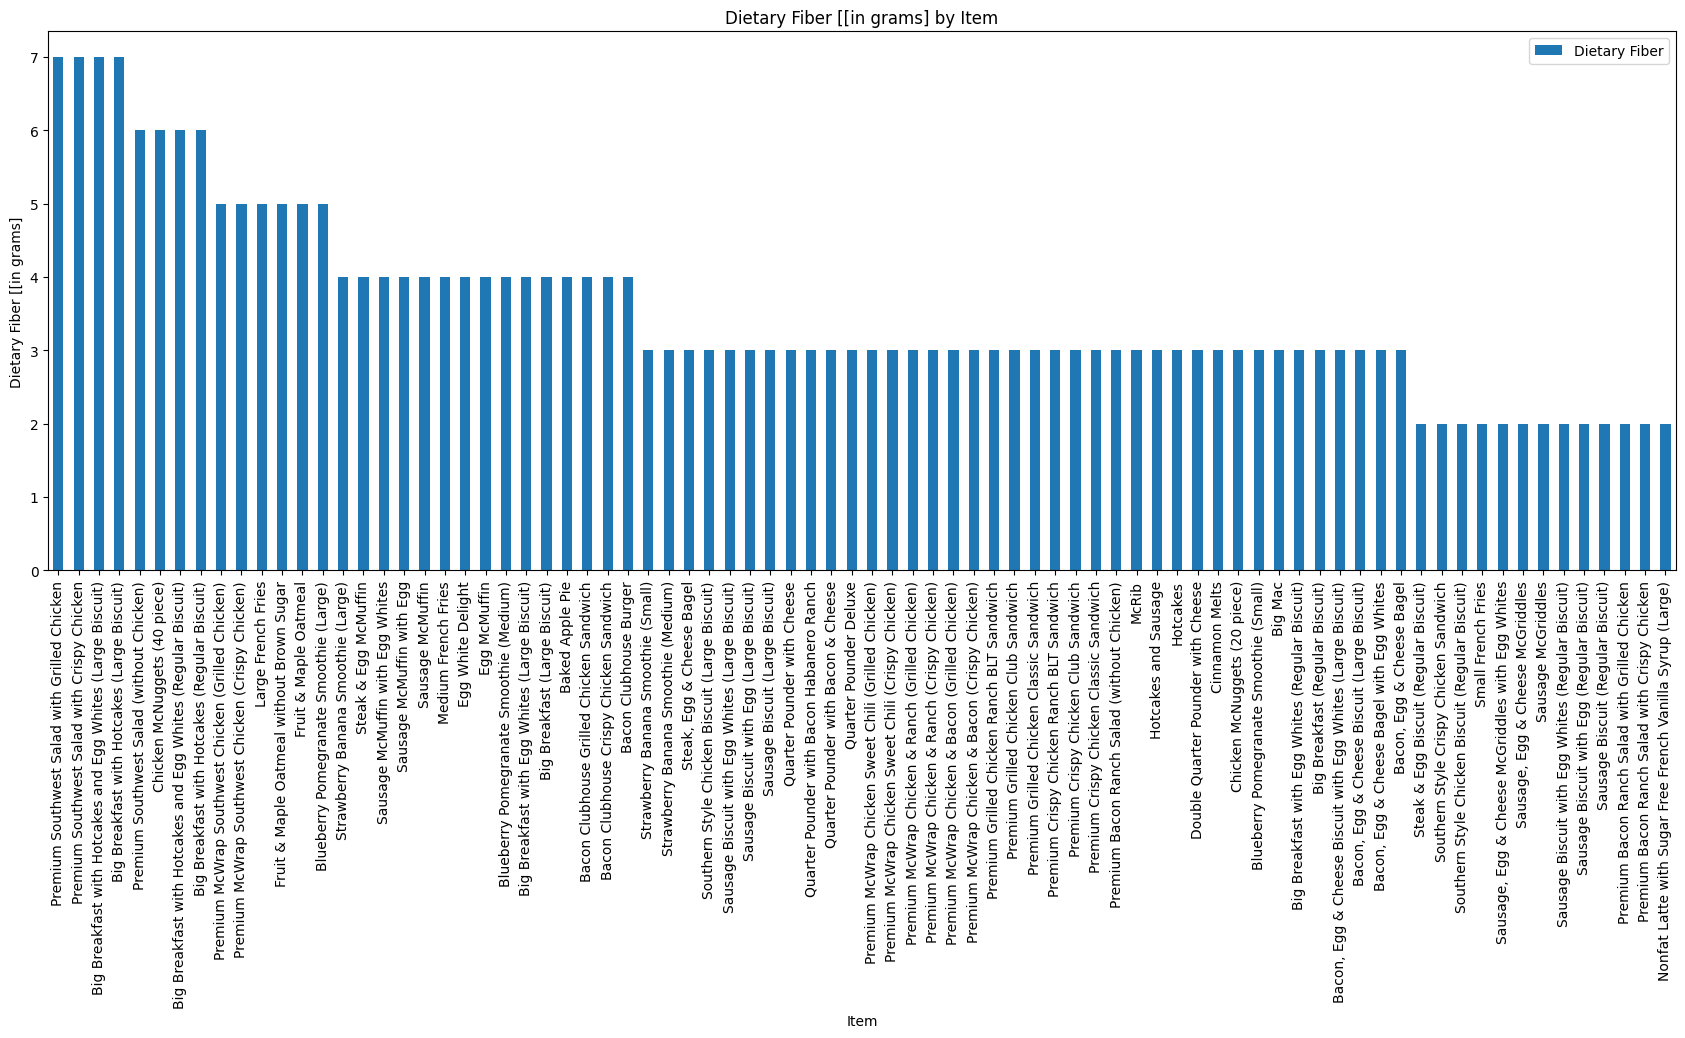

In [26]:
items_by_dietary_fiber = menu[ ['Item', 'Dietary Fiber'] ] \
                           .groupby('Item') \
                           .sum() \
                           .sort_values(['Dietary Fiber', 'Item'], ascending=False) \
                           .head(80)

items_by_dietary_fiber

items_by_dietary_fiber.plot(kind='bar', figsize=(21,7))

plt.ylabel('Dietary Fiber [[in grams]')
plt.title('Dietary Fiber [[in grams] by Item');

In [27]:
Which menu items have the least saturated fats, sodium, and sugar overall?

Object `overall` not found.


In [28]:
items_by_satfat_sod_sugar_dietf = menu[ ['Item','Saturated Fat', 'Sodium', 'Sugars', 'Dietary Fiber'] ] \
                           .groupby('Item') \
                           .sum() \
                           .sort_values(['Sodium', 'Sugars','Saturated Fat', 'Item'], ascending=True) \
                           .head(30)

items_by_satfat_sod_sugar_dietf

,Saturated Fat,Sodium,Sugars,Dietary Fiber
Item,,,,
Coffee (Large),0.0,0,0,0
Coffee (Medium),0.0,0,0,0
Coffee (Small),0.0,0,0,0
Dasani Water Bottle,0.0,0,0,0
Apple Slices,0.0,0,3,0
Coca-Cola Classic (Child),0.0,0,28,0
Minute Maid Orange Juice (Small),0.0,0,30,0
Coca-Cola Classic (Small),0.0,0,39,0
Minute Maid Orange Juice (Medium),0.0,0,39,0
